- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import pickle ## Used to import the data 

In [4]:
with open("C:/Users/manso/Desktop/TO GITHUB/Traffic Sign Classification/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("C:/Users/manso/Desktop/TO GITHUB/Traffic Sign Classification/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data) ## To avoid overfitting 
with open("C:/Users/manso/Desktop/TO GITHUB/Traffic Sign Classification/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
type(train)

dict

In [9]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [10]:
X_train,y_train=train['features'] , train['labels']
X_validation,y_validation=valid['features'],valid['labels']
X_test,y_test=test['features'] , test['labels']

In [16]:
print(X_train.shape)  ## 3 Channels <- Coloured Img
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [17]:
print(X_test.shape)
print(y_test.shape)

(12630, 32, 32, 3)
(12630,)


In [18]:
print(X_validation.shape)
print(y_validation.shape)

(4410, 32, 32, 3)
(4410,)


36

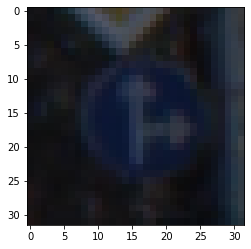

In [26]:
plt.imshow(X_train[1000])
y_train[1000]

In [32]:
from sklearn.utils import shuffle   ## Schuffling the data, such that the classes arent in order 
X_train,y_train=shuffle(X_train,y_train)

In [36]:
## Converting into Gray Scale
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)

X_validation_gray=np.sum(X_validation/3,axis=3,keepdims=True)

X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)

In [37]:
X_train_gray.shape

(34799, 32, 32, 1)

In [41]:
X_train_gray.max()

255.0

In [42]:
## Normaliation 
X_train_gray_norm=X_train_gray/255
X_test_gray_norm=X_test_gray/255
X_validation_gray_norm=X_validation_gray/255

In [43]:
X_train_gray_norm.max()

1.0

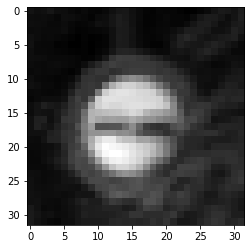

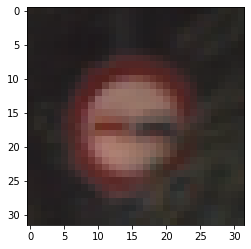

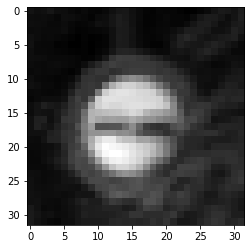

In [54]:
plt.imshow(X_train_gray[500].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[500].squeeze())
plt.figure()
plt.imshow(X_train_gray_norm[500].squeeze(),cmap='gray')

In [57]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

In [55]:
## Model Training 

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D, AveragePooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [62]:
model= Sequential()

## COnv 1 
model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
model.add(AveragePooling2D())

## Conv 2
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
model.add(AveragePooling2D())

model.add(Flatten())

## Layers
model.add(Dense(units=120,activation='relu'))
model.add(Dense(units=84,activation='relu'))

## Output
model.add(Dense(units=43,activation='softmax'))  ## 43 classes

model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [100]:
model.fit(X_train_gray_norm,
         y_train,
         batch_size=500,
         epochs=50,
         verbose=1,
         validation_data=(X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 16s 226ms/step - loss: 0.5404 - accuracy: 0.8600 - val_loss: 0.8047 - val_accuracy: 0.7880
Epoch 2/50
70/70 [==============================] - 16s 225ms/step - loss: 0.4652 - accuracy: 0.8799 - val_loss: 0.7405 - val_accuracy: 0.7975
Epoch 3/50
70/70 [==============================] - 15s 221ms/step - loss: 0.4064 - accuracy: 0.8962 - val_loss: 0.7128 - val_accuracy: 0.8184
Epoch 4/50
70/70 [==============================] - 16s 222ms/step - loss: 0.3568 - accuracy: 0.9104 - val_loss: 0.6933 - val_accuracy: 0.8082
Epoch 5/50
70/70 [==============================] - 15s 220ms/step - loss: 0.3165 - accuracy: 0.9203 - val_loss: 0.6564 - val_accuracy: 0.8259
Epoch 6/50
70/70 [==============================] - 15s 221ms/step - loss: 0.2871 - accuracy: 0.9275 - val_loss: 0.6539 - val_accuracy: 0.8333
Epoch 7/50
70/70 [==============================] - 16s 222ms/step - loss: 0.2559 - accuracy: 0.9360 - val_loss: 0.6849 - val_accuracy: 0.8349

In [101]:
## Evaluation 

In [102]:
model.history.history

{'loss': [0.5403617024421692,
  0.46518537402153015,
  0.40640196204185486,
  0.3568233847618103,
  0.31647545099258423,
  0.28711891174316406,
  0.25587165355682373,
  0.23248617351055145,
  0.20968377590179443,
  0.18962298333644867,
  0.18257443606853485,
  0.16584433615207672,
  0.15447159111499786,
  0.14233772456645966,
  0.13141679763793945,
  0.11931966990232468,
  0.10842021554708481,
  0.10266967117786407,
  0.09748143702745438,
  0.09107055515050888,
  0.08387285470962524,
  0.07830402255058289,
  0.07624763995409012,
  0.07142497599124908,
  0.06401147693395615,
  0.05993882939219475,
  0.05542774870991707,
  0.05410075560212135,
  0.0525548979640007,
  0.04846374690532684,
  0.04645448178052902,
  0.042546313256025314,
  0.0391245111823082,
  0.038084112107753754,
  0.0349905751645565,
  0.03523658588528633,
  0.033746328204870224,
  0.030521569773554802,
  0.027907658368349075,
  0.025437770411372185,
  0.025742821395397186,
  0.02671467885375023,
  0.024467505514621735,


In [103]:
loss=model.history.history['loss']
accuracy=model.history.history['accuracy']
val_loss=model.history.history['val_loss']
val_accuracy=model.history.history['val_accuracy']

Text(0, 0.5, 'Accuracy')

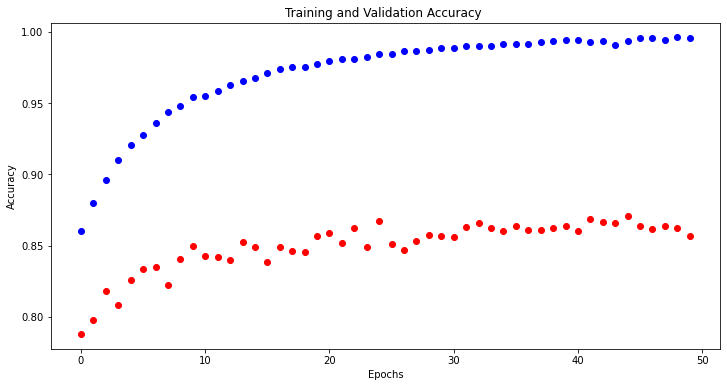

In [104]:
epochs=range(len(accuracy))

plt.figure(figsize=(12,6))
plt.plot(epochs,accuracy,'bo')
plt.plot(epochs,val_accuracy,'ro')
plt.title('Training and Validation Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'loss')

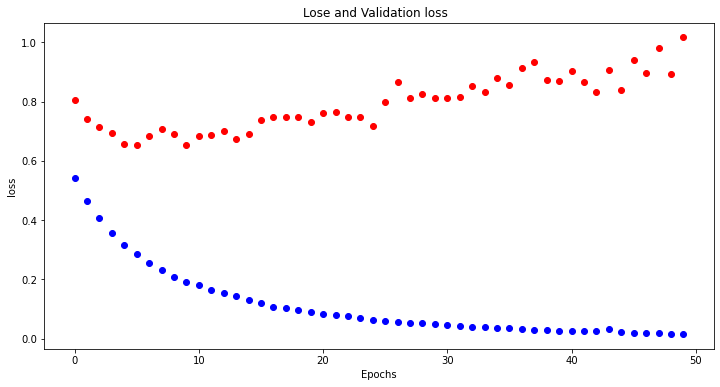

In [105]:
epochs=range(len(accuracy))

plt.figure(figsize=(12,6))
plt.plot(epochs,loss,'bo')
plt.plot(epochs,val_loss,'ro')
plt.title('Lose and Validation loss  ')
plt.xlabel('Epochs')
plt.ylabel('loss')

In [106]:
predicted_classes= model.predict_classes(X_test_gray_norm)

In [107]:
from sklearn.metrics import confusion_matrix

Text(204.0, 0.5, 'True Label')

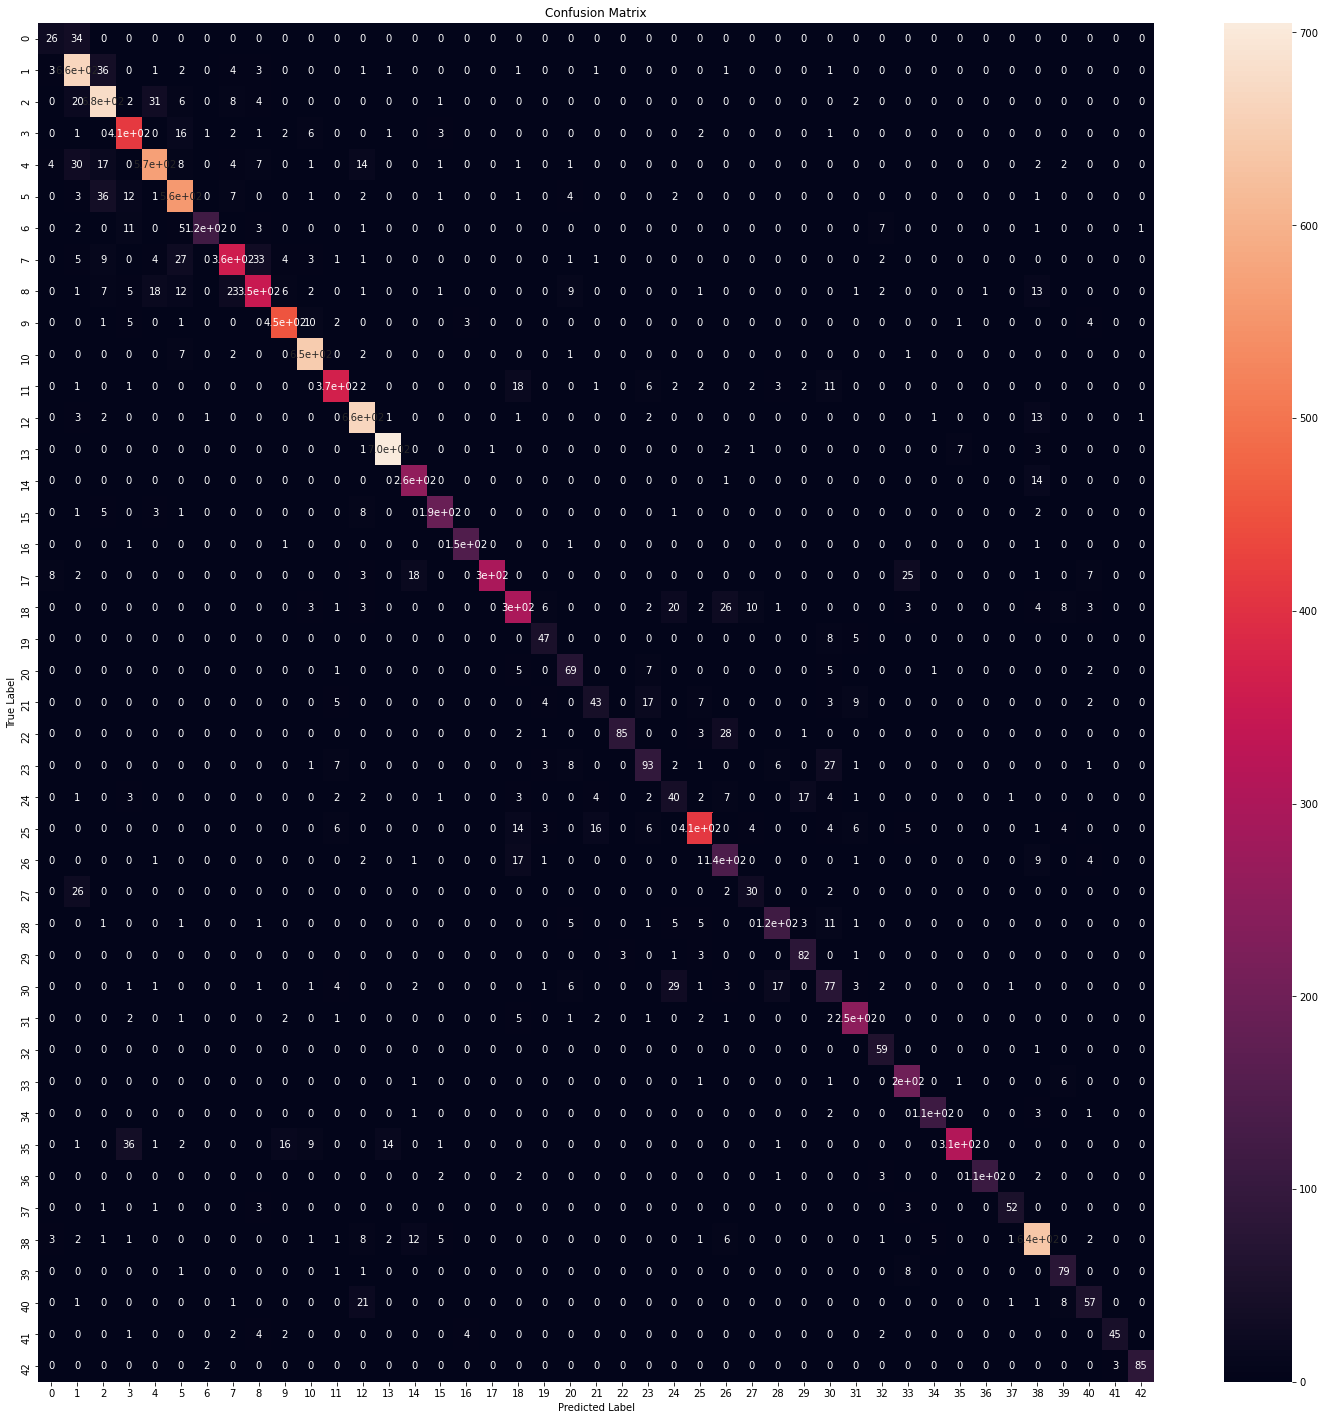

In [108]:
conf_mat= confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

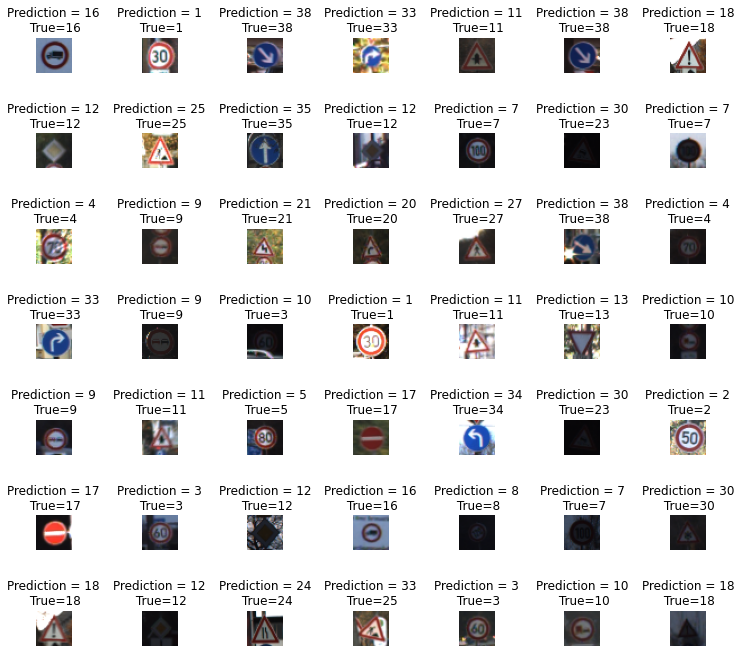

In [113]:
L=7
W=7


fig,axes = plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'Prediction = {predicted_classes[i]}\n True={y_test[i]}')
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=2)